# TP1

Elaborado por: Alan Churichi

In [1]:
%load_ext lab_black

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

### Parte 1

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [2]:
def load_image(path, filename, grayscale=False):
    flags = {"flags": cv.IMREAD_GRAYSCALE} if grayscale else {}
    img = cv.imread(os.path.join(path, filename), **flags)
    if grayscale:
        return img
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)


images_path = "/tf/notebooks/CEIA/computer-vision-1/tp1/assets/coord_cromaticas"

filenames = ["CoordCrom_1.png", "CoordCrom_2.png", "CoordCrom_3.png"]
images = [load_image(images_path, filename) for filename in filenames]

In [3]:
def transform_chrom_coord(img):
    num = img.astype(np.float64)
    den = img.sum(axis=2, keepdims=True).astype(np.float64)
    transformed_img = np.divide(
        num,
        den,
        out=np.zeros_like(num),
        where=den != 0,
    )
    transformed_img *= 255 / transformed_img.max()  # Scale to 0-255
    return transformed_img.astype(np.uint8)

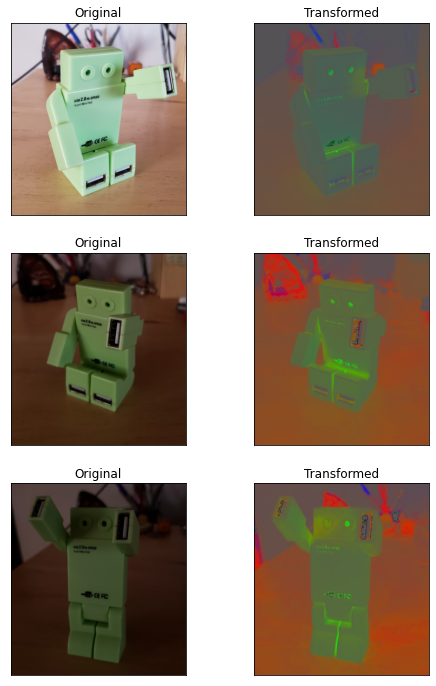

In [4]:
_, axes = plt.subplots(3, 2, figsize=(8, 12))
for i, image in enumerate(images):
    axes[i][0].imshow(image)
    axes[i][0].title.set_text("Original")
    axes[i][0].xaxis.set_visible(False)
    axes[i][0].yaxis.set_visible(False)
    axes[i][1].imshow(transform_chrom_coord(image))
    axes[i][1].title.set_text("Transformed")
    axes[i][1].xaxis.set_visible(False)
    axes[i][1].yaxis.set_visible(False)

2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [5]:
images_path = "/tf/notebooks/CEIA/computer-vision-1/tp1/assets/white_patch"

filenames = [
    "test_blue.png",
    "test_green.png",
    "test_red.png",
    "wp_blue.jpg",
    "wp_green.png",
    "wp_green3.jpg",
    "wp_no_white.png",
    "wp_red.png",
    "wp_red2.jpg",
]
images = [load_image(images_path, filename) for filename in filenames]

In [6]:
def transform_white_patch(img, filename=None):
    transformed_img = img.astype(np.float32)
    rgb_max = transformed_img.reshape(-1, 3).max(axis=0)
    if np.all(rgb_max == 255):
        warnings.warn(
            f"{filename if filename else 'Image'} has a maximum of 255 in each channel. White patch won't take effect."
        )
    transformed_img *= 255 / rgb_max  # Apply white patch algorithm
    transformed_img *= 255 / transformed_img.max()  # Scale to 0-255
    return transformed_img.astype(np.uint8)


def plot_white_patch(img, filename=None, figsize=(10, 10)):
    _, axes = plt.subplots(1, 2, figsize=figsize)
    axes[0].imshow(img)
    axes[0].title.set_text("Original")
    axes[0].xaxis.set_visible(False)
    axes[0].yaxis.set_visible(False)
    axes[1].imshow(transform_white_patch(img, filename))
    axes[1].title.set_text("Transformed")
    axes[1].xaxis.set_visible(False)
    axes[1].yaxis.set_visible(False)

/tmp/ipykernel_147/3270125338.py:5: UserWarning: wp_blue.jpg has a maximum of 255 in each channel. White patch won't take effect.
  warnings.warn(


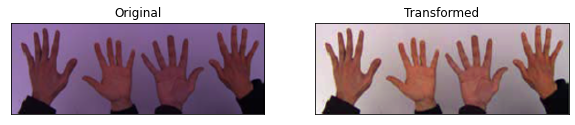

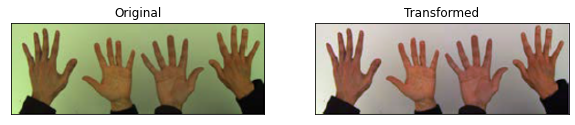

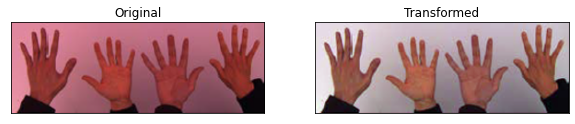

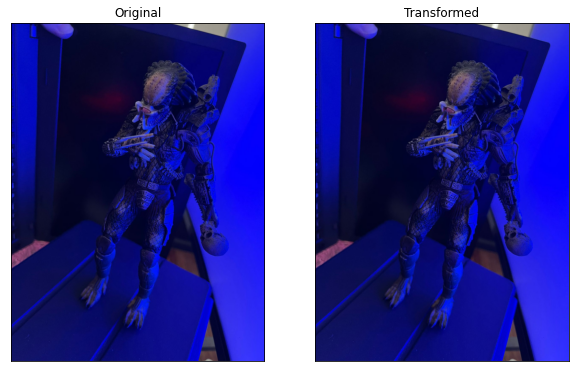

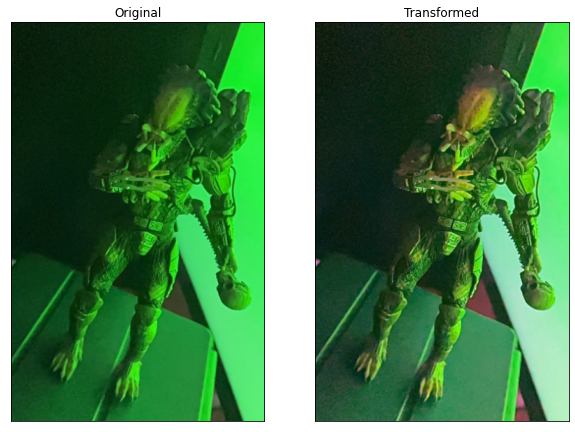

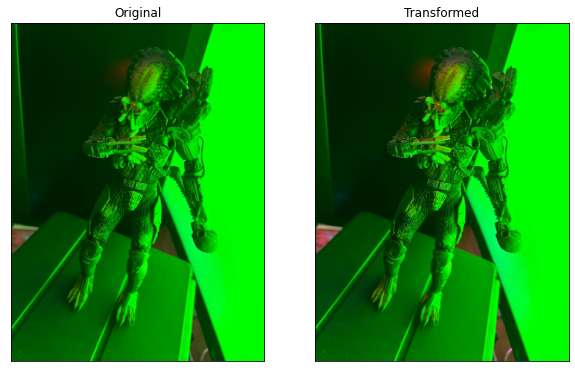

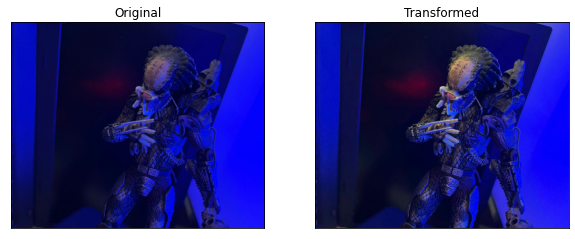

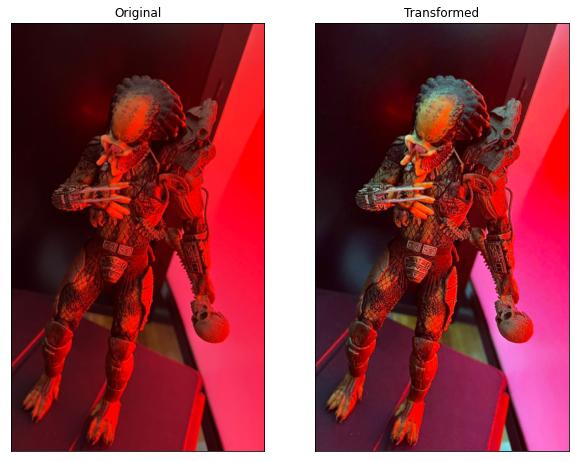

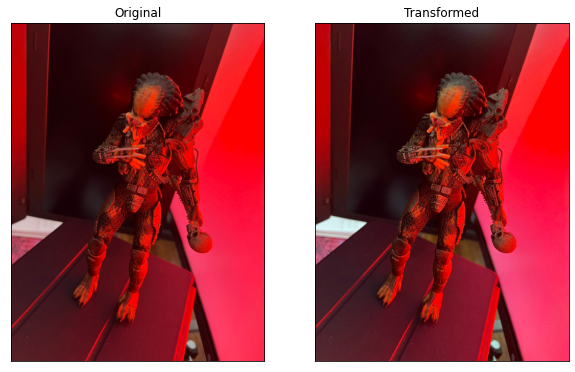

In [7]:
for filename, img in zip(filenames, images):
    plot_white_patch(img, filename, (10, 10))

### Parte 2:

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

In [8]:
images_path = "/tf/notebooks/CEIA/computer-vision-1/tp1/assets"

img1 = load_image(images_path, "img1_tp.png", grayscale=True)
img2 = load_image(images_path, "img2_tp.png", grayscale=True)

print(f"img1_tp.png shape: {img1.shape}")
print(f"img2_tp.png shape: {img2.shape}")

img1_tp.png shape: (288, 287)
img2_tp.png shape: (288, 287)


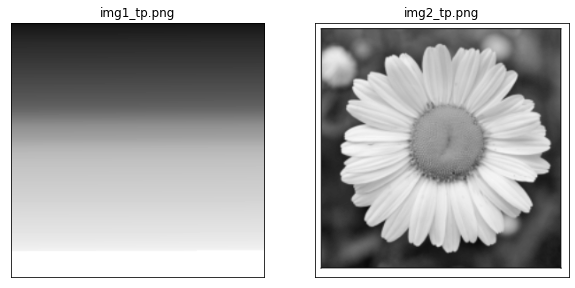

In [9]:
_, axes = plt.subplots(1, 2, figsize=(10, 10))

axes[0].imshow(img1, cmap="gray")
axes[0].title.set_text("img1_tp.png")
axes[0].xaxis.set_visible(False)
axes[0].yaxis.set_visible(False)

axes[1].imshow(img2, cmap="gray")
axes[1].title.set_text("img2_tp.png")
axes[1].xaxis.set_visible(False)
axes[1].yaxis.set_visible(False)

2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

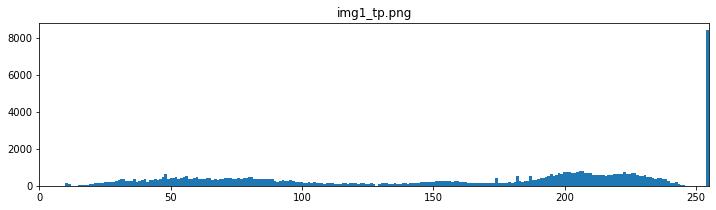

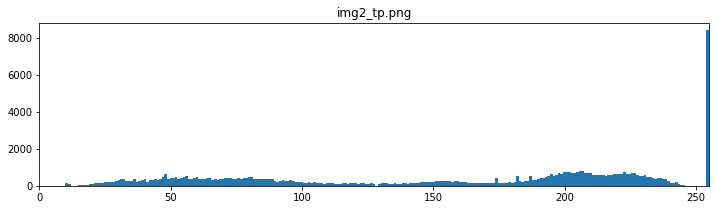

In [10]:
plt.figure(figsize=(12, 3))
plt.hist(img1.ravel(), 255)
plt.title("img1_tp.png")
plt.xlim([0, 255])
plt.show()

plt.figure(figsize=(12, 3))
plt.hist(img2.ravel(), 255)
plt.title("img2_tp.png")
plt.xlim([0, 255])
plt.show()

In [11]:
sorted_img1 = np.sort(img1.ravel())
sorted_img2 = np.sort(img2.ravel())
np.all(sorted_img1 == sorted_img2)

True

3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas

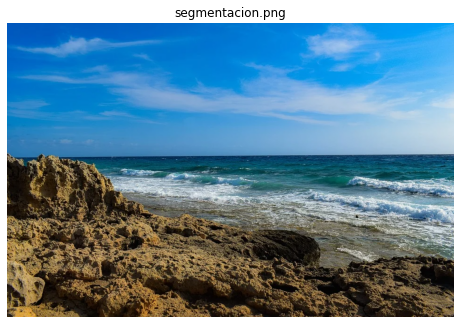

In [12]:
img = load_image(images_path, "segmentacion.png")

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("segmentacion.png")
plt.show()

In [29]:
default_config = {
    "all": {"title": "All channels"},
    "c1": {"title": "Channel 1", "color": "r"},
    "c2": {"title": "Channel 2", "color": "g"},
    "c3": {"title": "Channel 3", "color": "b"},
}


def plot_channels(img, config=default_config, figsize=(10, 8)):
    c1, c2, c3 = cv.split(img)
    c1_hist, _ = np.histogram(c1.ravel(), 256, [0, 255])
    c2_hist, _ = np.histogram(c2.ravel(), 256, [0, 255])
    c3_hist, _ = np.histogram(c3.ravel(), 256, [0, 255])

    f, axes = plt.subplots(
        4, 1, sharex=True, figsize=figsize, gridspec_kw={"height_ratios": [3, 1, 1, 1]}
    )

    axes[0].plot(c1_hist, color=config["c1"]["color"])
    axes[0].plot(c2_hist, color=config["c2"]["color"])
    axes[0].plot(c3_hist, color=config["c3"]["color"])
    axes[0].title.set_text(config["all"]["title"])
    axes[0].set_xlim([0, 255])

    axes[1].plot(c1_hist, color=config["c1"]["color"])
    axes[1].title.set_text(config["c1"]["title"])
    axes[1].set_xlim([0, 255])

    axes[2].plot(c2_hist, color=config["c2"]["color"])
    axes[2].title.set_text(config["c2"]["title"])
    axes[2].set_xlim([0, 255])

    axes[3].plot(c3_hist, color=config["c3"]["color"])
    axes[3].title.set_text(config["c3"]["title"])
    axes[3].set_xlim([0, 255])

    f.tight_layout()

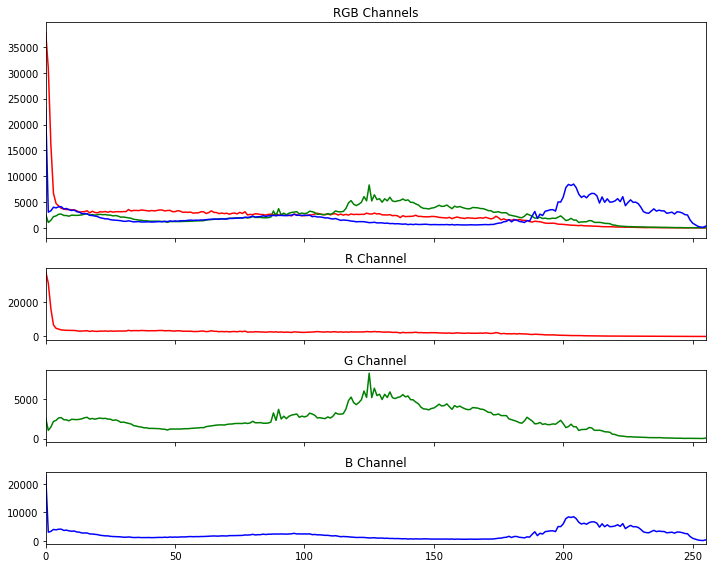

In [30]:
plot_channels(
    img,
    {
        "all": {"title": "RGB Channels"},
        "c1": {"title": "R Channel", "color": "r"},
        "c2": {"title": "G Channel", "color": "g"},
        "c3": {"title": "B Channel", "color": "b"},
    },
)

In [111]:
def segment_image(img, lower_limit, upper_limit, figsize=(14, 14), format=None):
    mask = cv.inRange(img, np.array(lower_limit), np.array(upper_limit))
    segmented_img = cv.bitwise_and(img, img, mask=mask)
    if format:
        segmented_img = cv.cvtColor(segmented_img, format)

    _, axes = plt.subplots(1, 2, figsize=figsize)

    axes[0].imshow(segmented_img)
    axes[0].title.set_text("Segmented Image")
    axes[0].xaxis.set_visible(False)
    axes[0].yaxis.set_visible(False)

    axes[1].imshow(mask, cmap="gray")
    axes[1].title.set_text("Mask")
    axes[1].xaxis.set_visible(False)
    axes[1].yaxis.set_visible(False)

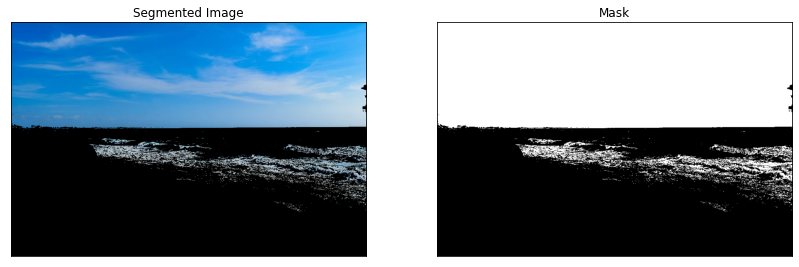

In [112]:
segment_image(img, lower_limit=[0, 80, 175], upper_limit=[200, 255, 255])

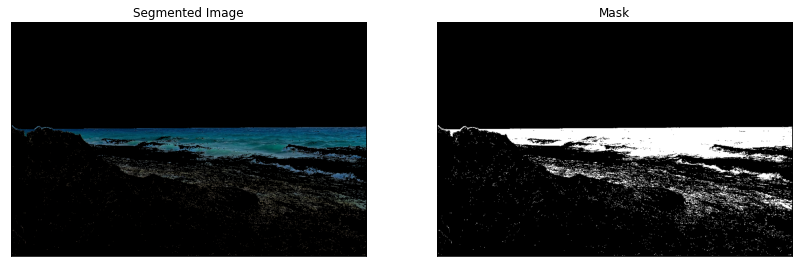

In [113]:
segment_image(img, lower_limit=[0, 0, 60], upper_limit=[100, 150, 160])

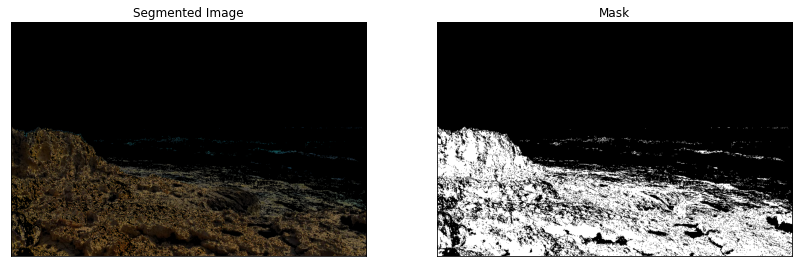

In [114]:
segment_image(img, lower_limit=[15, 0, 0], upper_limit=[150, 170, 90])

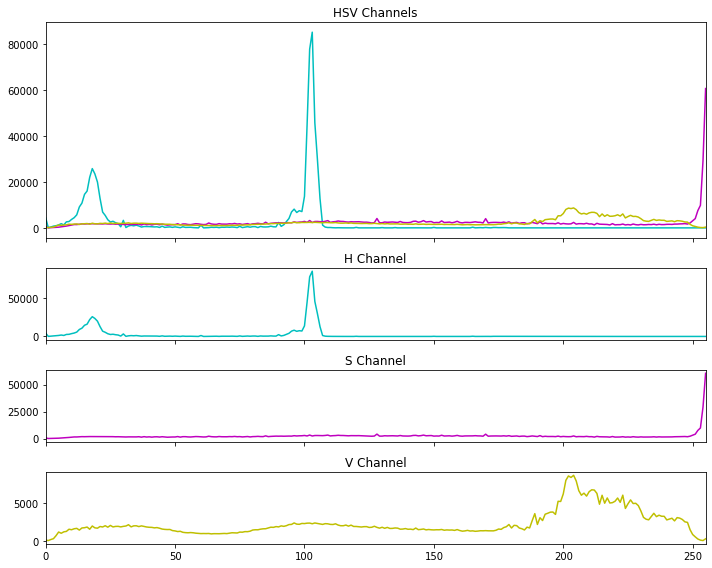

In [50]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

plot_channels(
    img_hsv,
    {
        "all": {"title": "HSV Channels"},
        "c1": {"title": "H Channel", "color": "c"},
        "c2": {"title": "S Channel", "color": "m"},
        "c3": {"title": "V Channel", "color": "y"},
    },
)

In [109]:
def segment_image(img, lower_limit, upper_limit, figsize=(14, 14), format=None):
    mask = cv.inRange(img, np.array(lower_limit), np.array(upper_limit))
    segmented_img = cv.bitwise_and(img, img, mask=mask)
    if format:
        segmented_img = cv.cvtColor(segmented_img, format)

    _, axes = plt.subplots(1, 2, figsize=figsize)

    axes[0].imshow(segmented_img)
    axes[0].title.set_text("Segmented Image")
    axes[0].xaxis.set_visible(False)
    axes[0].yaxis.set_visible(False)

    axes[1].imshow(mask, cmap="gray")
    axes[1].title.set_text("Mask")
    axes[1].xaxis.set_visible(False)
    axes[1].yaxis.set_visible(False)

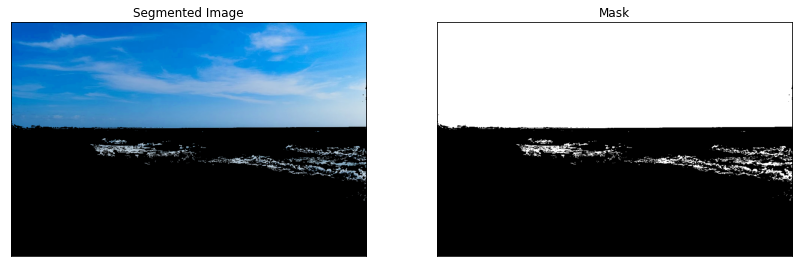

In [180]:
segment_image(
    img_hsv,
    lower_limit=[100, 30, 175],
    upper_limit=[255, 255, 255],
    format=cv.COLOR_HSV2RGB,
)

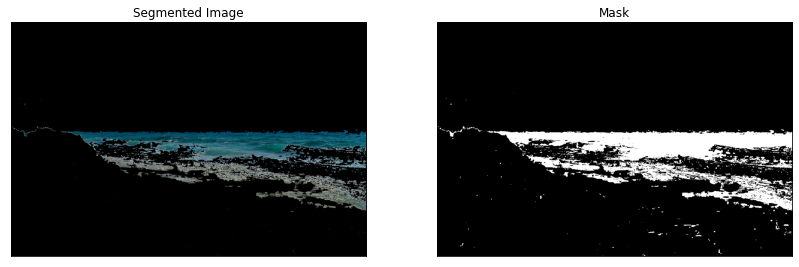

In [179]:
segment_image(
    img_hsv,
    lower_limit=[35, 0, 0],
    upper_limit=[100, 255, 190],
    format=cv.COLOR_HSV2RGB,
)

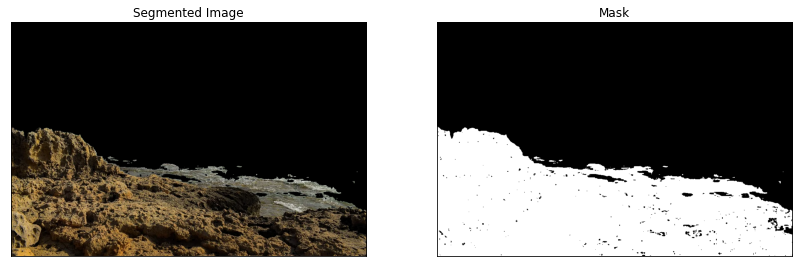

In [200]:
segment_image(
    img_hsv,
    lower_limit=[0, 0, 0],
    upper_limit=[50, 255, 255],
    format=cv.COLOR_HSV2RGB,
)